In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings as wr
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import copy
import math
df = pd.read_csv('/Princess.csv')
df

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,9.4,2.2,15.8,5.9,29.7,18.7,11.5,13.1,15.3,22.5,10.1,4.7,13.8,0
2334,12.1,7.6,20.6,5.3,18.9,19.1,9.4,11.9,21.8,12.0,26.7,8.4,24.4,1
2335,15.2,33.2,7.2,14.5,16.0,16.7,1.2,32.5,34.5,25.9,3.9,18.0,19.2,1
2336,2.0,17.0,33.2,13.2,29.1,35.5,19.7,30.3,30.7,4.3,15.7,20.5,2.1,1


In [29]:
df.shape

(2338, 14)

In [30]:
df.describe()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,15.365697,10.946749,16.115654,13.627973,15.069504,14.157271,12.328914,14.911206,16.871685,14.890590,10.916125,15.371600,12.084003,0.496578
std,8.669969,7.225162,8.372518,7.545244,8.349340,7.831476,7.709753,8.132678,9.579027,8.014197,7.045195,8.559139,8.047540,0.500095
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.500000,5.300000,9.600000,7.600000,8.625000,7.900000,6.325000,8.400000,8.900000,8.800000,5.200000,8.800000,5.600000,0.000000
50%,14.700000,9.500000,15.800000,13.100000,14.500000,13.500000,11.200000,14.400000,16.300000,14.400000,9.700000,14.800000,10.500000,0.000000
75%,21.300000,15.575000,22.000000,19.000000,20.700000,19.500000,16.900000,20.500000,24.000000,20.400000,15.375000,21.100000,17.275000,1.000000
max,42.100000,34.100000,40.800000,35.800000,40.400000,37.800000,37.300000,39.400000,44.800000,39.500000,33.700000,42.000000,37.800000,1.000000


In [31]:
df.head()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0


In [32]:
def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]
    return outliers

# Example usage
outliers = find_outliers_IQR(df)
print(outliers)

      Phoenix Feather  Unicorn Horn  Dragon's Blood  Mermaid Tears  \
0                 NaN           NaN             NaN            NaN   
1                 NaN           NaN             NaN            NaN   
2                 NaN           NaN             NaN            NaN   
3                 NaN           NaN             NaN            NaN   
4                 NaN           NaN             NaN            NaN   
...               ...           ...             ...            ...   
2333              NaN           NaN             NaN            NaN   
2334              NaN           NaN             NaN            NaN   
2335              NaN          33.2             NaN            NaN   
2336              NaN           NaN             NaN            NaN   
2337              NaN           NaN             NaN            NaN   

      Fairy Dust  Goblin Toes  Witch's Brew  Griffin Claw  Troll Hair  \
0            NaN          NaN           NaN           NaN         NaN   
1            

In [33]:
outlier_condition = (df['Unicorn Horn'] == 33.2) & (df.index == 2335)

# Removing the outlier
df_cleaned = df[~outlier_condition]

# Resetting the index after removal
df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(df_cleaned)

      Phoenix Feather  Unicorn Horn  Dragon's Blood  Mermaid Tears  \
0                 2.4          18.7            18.4           27.9   
1                 2.1           6.0            15.0           13.3   
2                17.2          13.9            23.8            6.8   
3                 8.4           9.7             6.8           26.9   
4                22.1          10.8            16.4           10.5   
...               ...           ...             ...            ...   
2332             14.6          14.2            30.3            9.7   
2333              9.4           2.2            15.8            5.9   
2334             12.1           7.6            20.6            5.3   
2335              2.0          17.0            33.2           13.2   
2336              6.2           2.6            11.7           23.8   

      Fairy Dust  Goblin Toes  Witch's Brew  Griffin Claw  Troll Hair  \
0            7.9          9.6          18.3          13.2         2.5   
1           1

In [7]:
y= df_cleaned['Cured']
print(y)

0       0
1       0
2       1
3       1
4       0
       ..
2332    0
2333    0
2334    1
2335    1
2336    1
Name: Cured, Length: 2337, dtype: int64


In [8]:
X= df_cleaned.drop(['Cured'], axis=1)
print(X)

      Phoenix Feather  Unicorn Horn  Dragon's Blood  Mermaid Tears  \
0                 2.4          18.7            18.4           27.9   
1                 2.1           6.0            15.0           13.3   
2                17.2          13.9            23.8            6.8   
3                 8.4           9.7             6.8           26.9   
4                22.1          10.8            16.4           10.5   
...               ...           ...             ...            ...   
2332             14.6          14.2            30.3            9.7   
2333              9.4           2.2            15.8            5.9   
2334             12.1           7.6            20.6            5.3   
2335              2.0          17.0            33.2           13.2   
2336              6.2           2.6            11.7           23.8   

      Fairy Dust  Goblin Toes  Witch's Brew  Griffin Claw  Troll Hair  \
0            7.9          9.6          18.3          13.2         2.5   
1           1

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (1869, 13)
The shape of y_train is: (1869,)
We have m = 1869 training examples


In [11]:
def sigmoid(z):



    g = 1/(1+np.exp(-z))


    return g

In [12]:
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost
    """

    m, n = X.shape

    cost = 0.0
    for i in range(m):
        # Access row i of the DataFrame using .values to get the NumPy array representation
        z_i = np.dot(X.values[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y.values[i]*np.log(f_wb_i) - (1-y.values[i])*np.log(1-f_wb_i) # Access y using .values[i]

    total_cost = cost / m

    return total_cost

In [13]:
m, n = X_train.shape
# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
def compute_gradient(X, y, w, b, *argv):
    """
    Computes the gradient for logistic regression

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ###


    for i in range(m):
        z_wb = 0
        for j in range(n):
            z_wb += X.iloc[i, j] * w[j]
        z_wb += b
        f_wb = sigmoid(z_wb)

        dj_db_i = f_wb - y.iloc[i]
        dj_db += dj_db_i

        for j in range(n):
            dj_dw_i = (f_wb- y.iloc[i]) * X.iloc[i, j]
            dj_dw[j] += dj_dw_i

    dj_dw = dj_dw/m
    dj_db = dj_db/m
    ### END CODE HERE ###


    return dj_db, dj_dw

In [16]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.005082932049224184
dj_dw at initial w and b (zeros):[-0.15361155698234338, 0.018378812199037028, -0.048394863563402626, -0.15815944355270178, -0.13595505617977535, -0.21171749598715905, -0.9792402354200115, -0.08325307651150356, -2.52110754414125, -0.04125200642054629, -0.14547886570358465, 0.1630283574103799, -0.1461744248261101]


In [17]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([0.2, -0.5] + [0] * 11)
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())


dj_db at test w and b: -0.5050829317932624
dj_dw at test w and b: [-7.813269120492299, -5.4840556440021935, -8.067094699210651, -6.8813269103155426, -7.649438199169002, -7.368646331263822, -7.156875331665353, -7.556500799183927, -10.878651680080191, -7.422739429750246, -5.58464419210399, -7.4583199534121105, -6.183681109878034]


In [18]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant

    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [20]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(n) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 1000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     3.48   
Iteration  100: Cost     0.57   
Iteration  200: Cost     0.52   
Iteration  300: Cost     0.49   
Iteration  400: Cost     0.47   
Iteration  500: Cost     0.46   
Iteration  600: Cost     0.45   
Iteration  700: Cost     0.44   
Iteration  800: Cost     0.44   
Iteration  900: Cost     0.43   
Iteration  999: Cost     0.43   


In [26]:
def plot_decision_boundary(w, b, X, y, title=None, xlabel=None, ylabel=None, legend_loc='upper right'):
    """
    Plots the decision boundary for logistic regression with multiple features.

    Args:
        w (ndarray): Weights of the model.
        b (float): Bias of the model.
        X (ndarray): Input features.
        y (ndarray): Target labels.
        title (str, optional): Title of the plot. Defaults to None.
        xlabel (str, optional): Label for the x-axis. Defaults to None.
        ylabel (str, optional): Label for the y-axis. Defaults to None.
        legend_loc (str, optional): Location of the legend. Defaults to 'upper right'.
    """

    # Apply PCA to reduce dimensions to 2
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # Generate a meshgrid of points in the reduced feature space
    x1_min, x1_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    x2_min, x2_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                         np.arange(x2_min, x2_max, 0.1))

    # Calculate corresponding predictions (sigmoid applied to linear combination)
    Z = 1 / (1 + np.exp(-(np.dot(np.c_[xx1.ravel(), xx2.ravel()], w[:2]) + b)))
    Z = Z.reshape(xx1.shape)

    # Plot the decision boundary as a contour
    plt.contourf(xx1, xx2, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolors='k')

    # Set plot labels and title
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend(loc=legend_loc)
    plt.show()

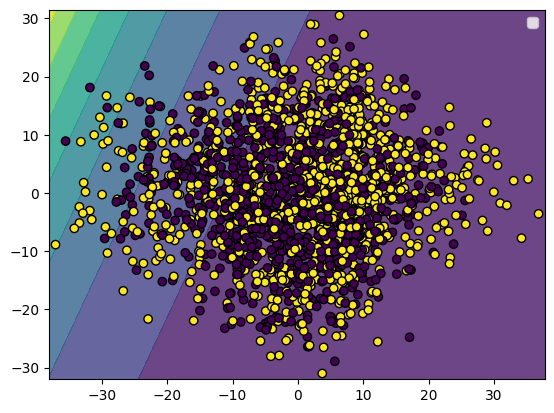

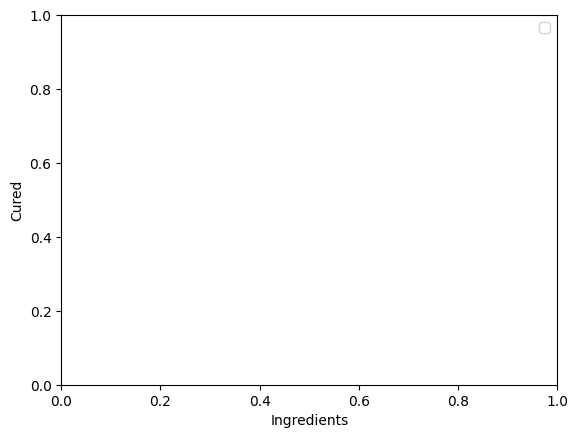

In [36]:
plot_decision_boundary(w, b, X_train, y_train)
# Set the y-axis label
plt.ylabel('Cured')
# Set the x-axis label
plt.xlabel('Ingredients')
plt.legend(loc="upper right")
plt.show()

In [56]:
def predict(X, w, b):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

      # Convert X to NumPy array to avoid potential indexing issues
    X = X.values if isinstance(X, pd.DataFrame) else X

    ### START CODE HERE ###
    # Loop over each example
    for i in range(m):
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            # Add the corresponding term to z_wb
            z_wb += X[i, j] * w[j]

        # Add bias term
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5

    ### END CODE HERE ###
    return p

In [57]:
np.random.seed(1)
tmp_w = np.random.randn(m)
tmp_b = 0.3
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')


Output of predict: shape (4,), value [1. 1. 0. 0.]


In [58]:
p = predict(X_train, w, b)  # Add print statements within predict function
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 81.219904
